In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%matplotlib inline

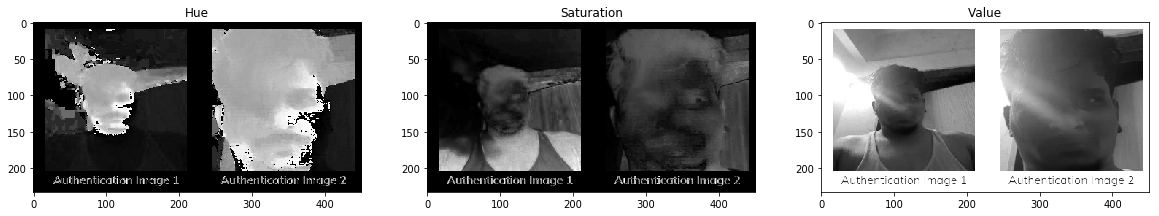

In [3]:
image = cv2.imread('direct_light_face_images/spec1.png')

# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

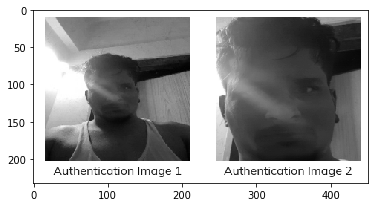

In [10]:
grayimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap='gray')

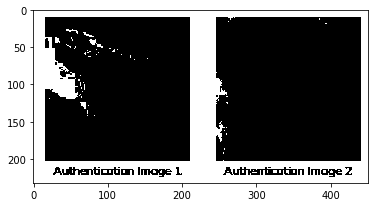

In [20]:
GLARE_MIN = np.array([0, 0, 100],np.uint8)
GLARE_MAX = np.array([0, 0, 255],np.uint8)
frame_threshed = cv2.inRange(hsv, GLARE_MIN, GLARE_MAX)
plt.imshow(frame_threshed, cmap='gray')

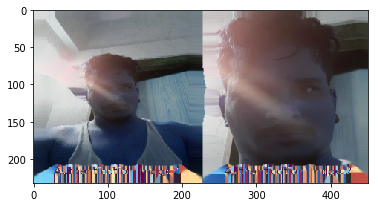

In [23]:
#INPAINT
mask1 = cv2.threshold(grayimg , 220, 255, cv2.THRESH_BINARY)[1]
result1 = cv2.inpaint(image, mask1, 0.1, cv2.INPAINT_TELEA)
plt.imshow(result1)

In [22]:
#CLAHE
clahefilter = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
claheCorrecttedFrame = clahefilter.apply(grayimg)

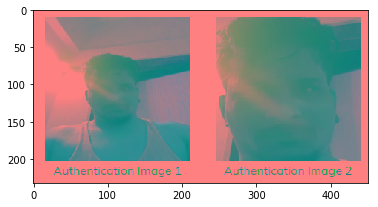

In [24]:
#COLOR 
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.imshow(lab)

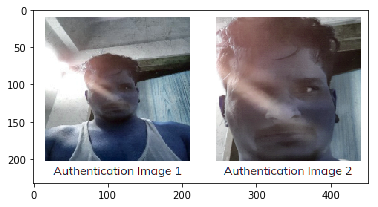

In [25]:
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
clahe_bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
plt.imshow(clahe_bgr)

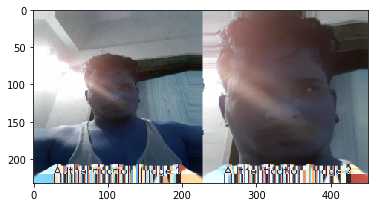

In [26]:
#INPAINT + HSV
result = cv2.inpaint(image, frame_threshed, 0.1, cv2.INPAINT_TELEA)
plt.imshow(result)

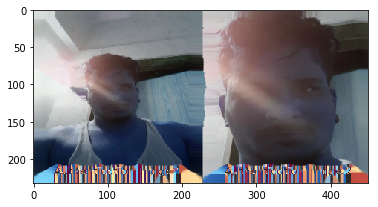

In [28]:
#INPAINT + CLAHE
grayimg1 = cv2.cvtColor(clahe_bgr, cv2.COLOR_BGR2GRAY)
mask2 = cv2.threshold(grayimg1 , 220, 255, cv2.THRESH_BINARY)[1]
result2 = cv2.inpaint(image, mask2, 0.1, cv2.INPAINT_TELEA)
plt.imshow(result2)

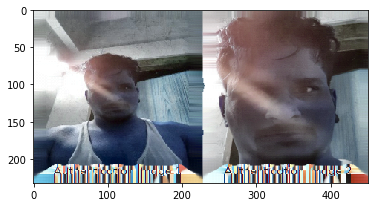

In [29]:
#HSV+ INPAINT + CLAHE
lab1 = cv2.cvtColor(result, cv2.COLOR_BGR2LAB)
lab_planes1 = cv2.split(lab1)
clahe1 = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes1[0] = clahe1.apply(lab_planes1[0])
lab1 = cv2.merge(lab_planes1)
clahe_bgr1 = cv2.cvtColor(lab1, cv2.COLOR_LAB2BGR)
plt.imshow(clahe_bgr1)